# MCA analysis for US surface air temperature and SST over the Pacific
This example is taken from https://atmos.washington.edu/~breth/classes/AS552/matlab/lect/html/MCA_PSSTA_USTA.html

In [1]:
from xMCA import xMCA
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
usta = xr.open_dataarray('data/USTA.nc').transpose(*['time', 'lat', 'lon'])
usta.name = 'USTA'
print(usta)

<xarray.DataArray 'USTA' (time: 396, lat: 5, lon: 12)>
array([[[-0.450303, -0.734848, ..., -4.270303, -2.69697 ],
        [ 1.066061,  2.691515, ..., -4.947273, -3.330303],
        ...,
        [      nan, -0.342424, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 1.524545,  1.370606, ..., -1.430303,  0.048485],
        [ 1.366364,  2.497273, ..., -0.593939, -0.079697],
        ...,
        [      nan,  0.695455, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[ 1.077879,  0.630303, ..., -1.262727, -1.496364],
        [ 1.020606,  0.114848, ..., -0.786667, -0.573939],
        ...,
        [      nan,  1.65    , ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[ 1.768182,  2.807879, ...,  0.885758,  0.618182],
        [ 1.555152,  3.435152, ..., -0.416667,  0.185152],
        ...,
        [      nan,  0.012121, ...,       nan,  

In [3]:
sstpc = xr.open_dataarray('data/SSTPac.nc').transpose(*['time', 'lat', 'lon'])
sstpc.name = 'SSTPC'
print(sstpc)

<xarray.DataArray 'SSTPC' (time: 396, lat: 30, lon: 84)>
[997920 values with dtype=float64]
Coordinates:
  * lat      (lat) int16 -29 -27 -25 -23 -21 -19 -17 ... 17 19 21 23 25 27 29
  * lon      (lon) uint16 124 126 128 130 132 134 ... 280 282 284 286 288 290
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 388 389 390 391 392 393 394 395


Decompsition and retrieve the first and second loadings and expansion coefficeints 

In [4]:
'''
decomposition, time should be in the first axis
lp is for SSTPC
rp is for USTA
'''

sst_ts = xMCA(sstpc, usta)
sst_ts.solver()
lp, rp = sst_ts.patterns(n=2)
le, re = sst_ts.expansionCoefs(n=2)
frac = sst_ts.covFracs(n=2)
print(frac)

<xarray.DataArray 'frac' (n: 2)>
array([0.407522, 0.391429])
Coordinates:
  * n        (n) int64 0 1
Attributes:
    long_name:  Fractions explained of the covariance matrix between SSTPC an...


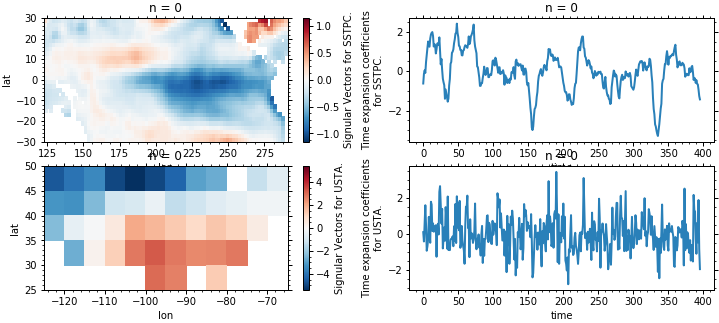

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 5))
lp[0].plot(ax=ax1[0])
le[0].plot(ax=ax1[1])

rp[0].plot(ax=ax2[0])
re[0].plot(ax=ax2[1])

Homogeneous and heterogeneous regression

In [6]:
lh, rh = sst_ts.homogeneousPatterns(n=1)
le, re = sst_ts.heterogeneousPatterns(n=1)

/Users/yefee/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


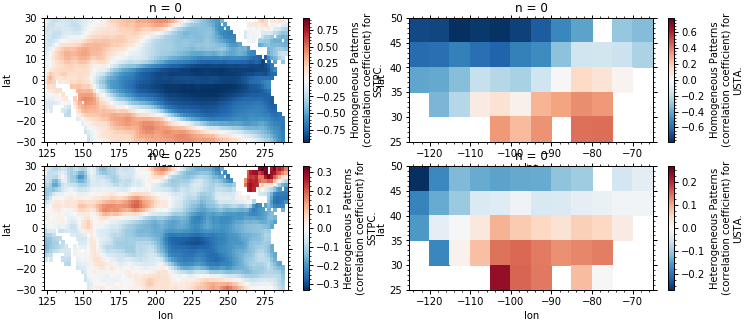

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 5))
lh[0].plot(ax=ax1[0])
rh[0].plot(ax=ax1[1])

le[0].plot(ax=ax2[0])
re[0].plot(ax=ax2[1])

In [10]:
lh, rh, lphom, rphom = sst_ts.homogeneousPatterns(n=1, statistical_test=True)
le, re, lphet, rphet = sst_ts.heterogeneousPatterns(n=1, statistical_test=True)

/Users/yefee/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/yefee/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yefee/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yefee/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


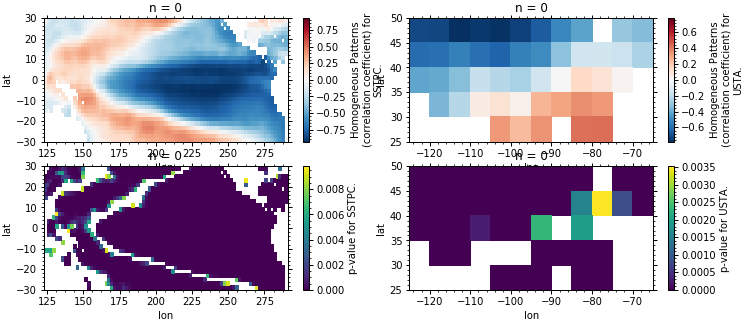

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 5))
lh[0].plot(ax=ax1[0])
rh[0].plot(ax=ax1[1])

# Only plot where p<0.01
lphom[0].where(lphom[0]<0.01).plot(ax=ax2[0])
rphom[0].where(rphom[0]<0.01).plot(ax=ax2[1])

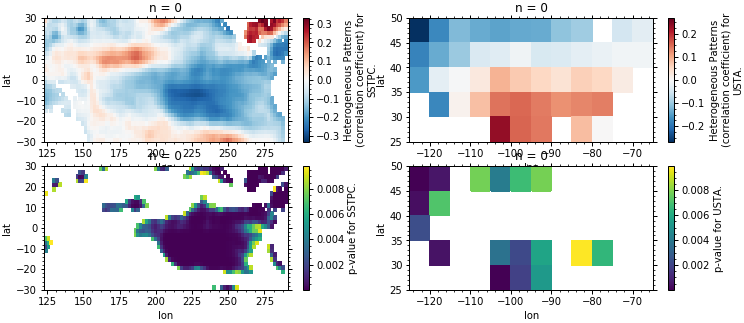

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 5))
le[0].plot(ax=ax1[0])
re[0].plot(ax=ax1[1])

# Only plot where p<0.01
lphet[0].where(lphet[0]<0.01).plot(ax=ax2[0])
rphet[0].where(rphet[0]<0.01).plot(ax=ax2[1])